#### Creating data to view and fit 

In [1]:
from sklearn.datasets import make_circles


x,y = make_circles(1000,noise=0.03,random_state=42)



In [2]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [4]:
import pandas as pd

circles = pd.DataFrame({"x0" : x[:,0],"x1":x[:,1],"label" : y})

circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


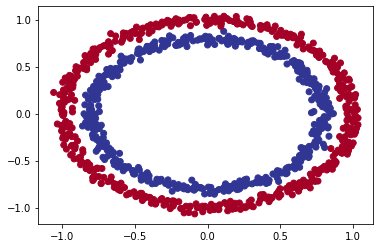

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)


#### Input and Output shapes

In [6]:
x.shape , y.shape

((1000, 2), (1000,))

In [7]:
len(x),len(y)

(1000, 1000)

In [8]:
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

### Modelling

In [9]:
import tensorflow as tf

In [12]:
tf.random.set_seed(42)
model_1  = tf.keras.Sequential([

    tf.keras.layers.Dense(1)
])


model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
optimizer = tf.keras.optimizers.SGD(),
metrics = ["accuracy"])


model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 6ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.4830


In [14]:
model_1.fit(x,y,epochs=200,verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [15]:
# Model 2

model2 = tf.keras.Sequential([

    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])


model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
optimizer = tf.keras.optimizers.SGD(),
metrics =["accuracy"] )


model2.fit(x,y,epochs=100,verbose=0)

In [16]:
model2.evaluate(x,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934733390808105, 0.5]

In [19]:
# Model 3

model3 = tf.keras.Sequential([

    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])


model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
optimizer = tf.keras.optimizers.Adam(),
metrics = ["accuracy"])

model3.fit(x,y,epochs=100,verbose=0)

In [20]:
model3.evaluate(x,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.5140


[0.6991010904312134, 0.5139999985694885]

In [21]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 4s 3ms/step
doing binary classifcation...


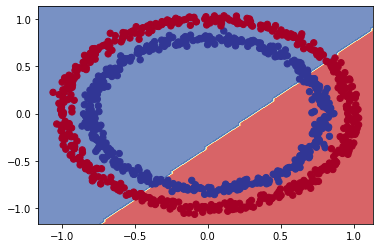

In [22]:
plot_decision_boundary(model3, x, y)

#### The missing piece :  Non Linearity

In [24]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([

    tf.keras.layers.Dense(1,activation ="linear")
])

model_4.compile(loss = "binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics= ["accuracy"])


history = model_4.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


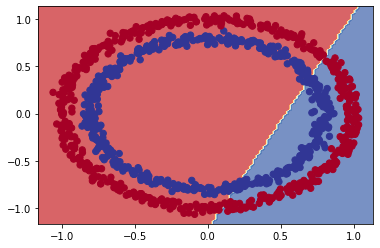

In [25]:
plot_decision_boundary(model_4,x,y)

In [26]:
tf.random.set_seed(42)


model_5 = tf.keras.Sequential([

    tf.keras.layers.Dense(1,activation="relu")
])


model_5.compile(loss = "binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics =["accuracy"])


history = model_5.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


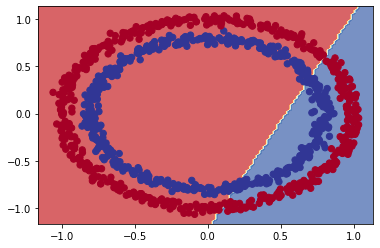

In [27]:
plot_decision_boundary(model_5,x,y)

In [43]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1) # Output Layer
])


model_6.compile(loss = "binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics = ["accuracy"])


history = model_6.fit(x,y,epochs=250,verbose=0)

In [37]:
model_6.evaluate(x,y)

32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


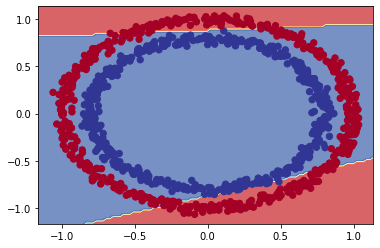

In [38]:
plot_decision_boundary(model_6,x,y)

In [41]:
tf.random.set_seed(42)


model_7 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])


model_7.compile(loss = "binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics = ["accuracy"])

history = model_7.fit(x,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 7ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 7ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


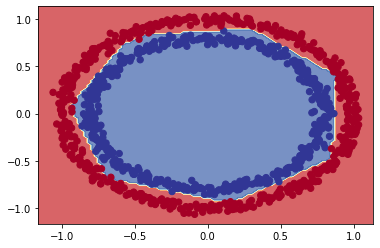

In [42]:
plot_decision_boundary(model_7,x,y)

#### Evaluating and improving our classification

In [44]:
len(x)

1000

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [47]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [49]:
# recreating a model to fit on the training data and to evaluate on test data

tf.random.set_seed(42)


model_8 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])



model_8.compile(loss ="binary_crossentropy",
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
metrics = ["accuracy"])


history = model_8.fit(x_train,y_train,epochs=250)

Epoch 1/250
25/25 [==============================] - 1s 6ms/step - loss: 0.6937 - accuracy: 0.4913
Epoch 2/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5063
Epoch 3/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.5063
Epoch 4/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.5175
Epoch 5/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6823 - accuracy: 0.5312
Epoch 6/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.5450
Epoch 7/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6810 - accuracy: 0.5475
Epoch 8/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.5475
Epoch 9/250
25/25 [==============================] - 0s 5ms/step - loss: 0.6799 - accuracy: 0.5462
Epoch 10/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 0.5500
Epoch 11/

In [51]:
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1113 - accuracy: 0.9800


[0.1112932562828064, 0.9800000190734863]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


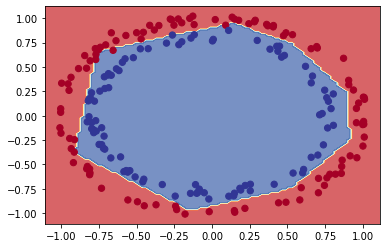

In [52]:
plot_decision_boundary(model_8,x_test,y_test)

##### Plotting loss curves

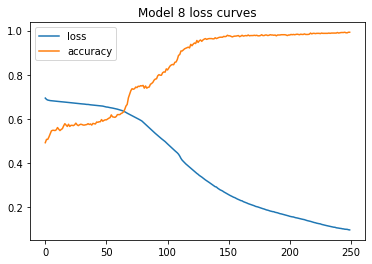

In [54]:
pd.DataFrame(history.history).plot()
plt.title("Model 8 loss curves");

#### Finding the best learning rate

In [57]:
tf.random.set_seed(42)


model_9 = tf.keras.Sequential([

    tf.keras.layers.Dense(4,activation ="relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])


model_9.compile(loss = "binary_crossentropy",
optimizer = "Adam",
metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch :1e-4 *  10**(epoch/20))


history = model_9.fit(x_train,y_train,epochs=100,callbacks=lr_scheduler)

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.6963 - accuracy: 0.4925 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.4913 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.4913 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.4900 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.4925 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.4963 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

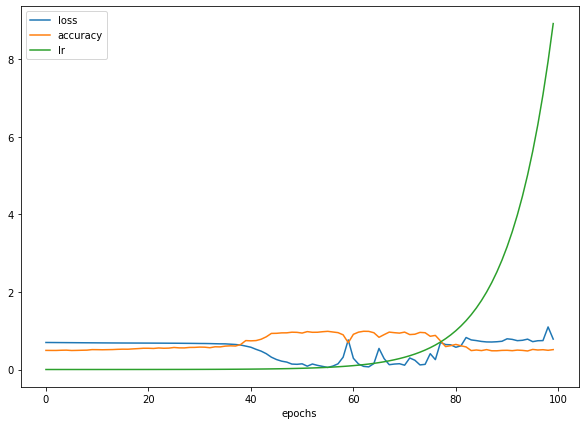

In [58]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs");

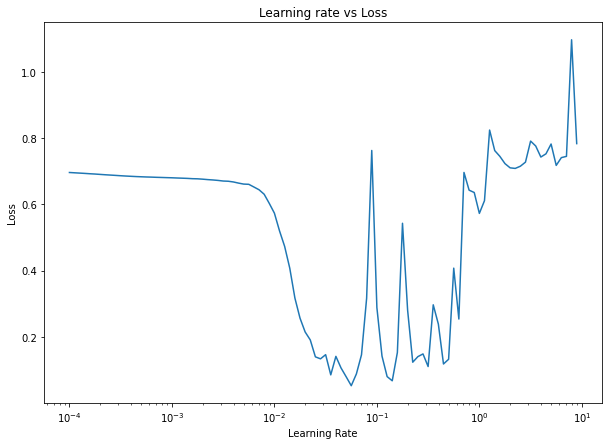

In [62]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss");